<b>Dataset Info:</b> Sample Data Set containing customer data and showing customers left last month

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

*Load the data file*

In [142]:
df=pd.read_csv("CustomerChurn.csv")

Look at the 5 top records of data

In [143]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [144]:
df.shape

(7043, 21)

In [145]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [146]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [147]:
# checking the data type of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [148]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<p>SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper</p>
<p>75% of customers have tenure less than 55 months</p>
<p>Average Monthly Charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month</p>

In [149]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [150]:
# calculate the percentage
df["Churn"].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

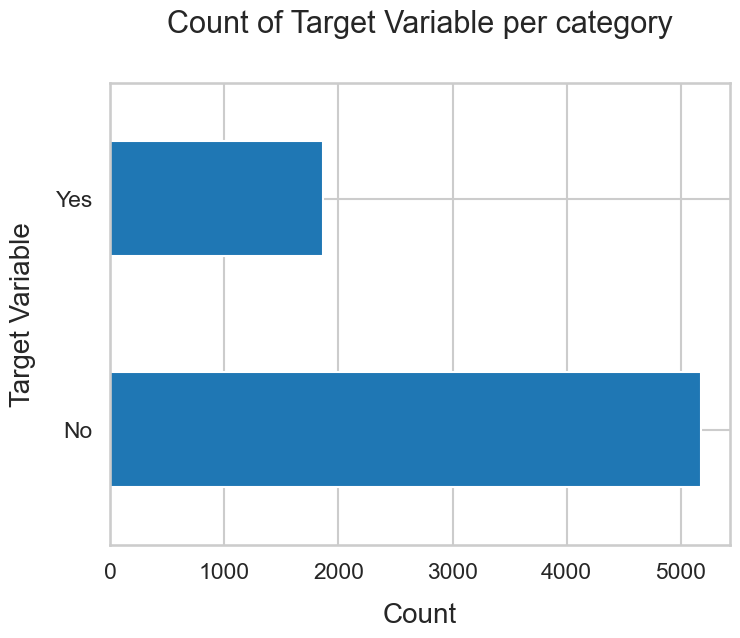

In [151]:
df["Churn"].value_counts().plot(kind="barh", figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per category", y=1.02)
plt.show()

In [152]:
# calculate the percentage
df["Churn"].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

<ul>
    <li>Data is highly imbalanced, ratio = 73:27</li>
    <li>So, we analyse the data with other features while taking the target values seperately to get some insights</li>
</ul>

In [153]:
# Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges are object. it should be number.. it it is null also it will show non null because empty string is also an object

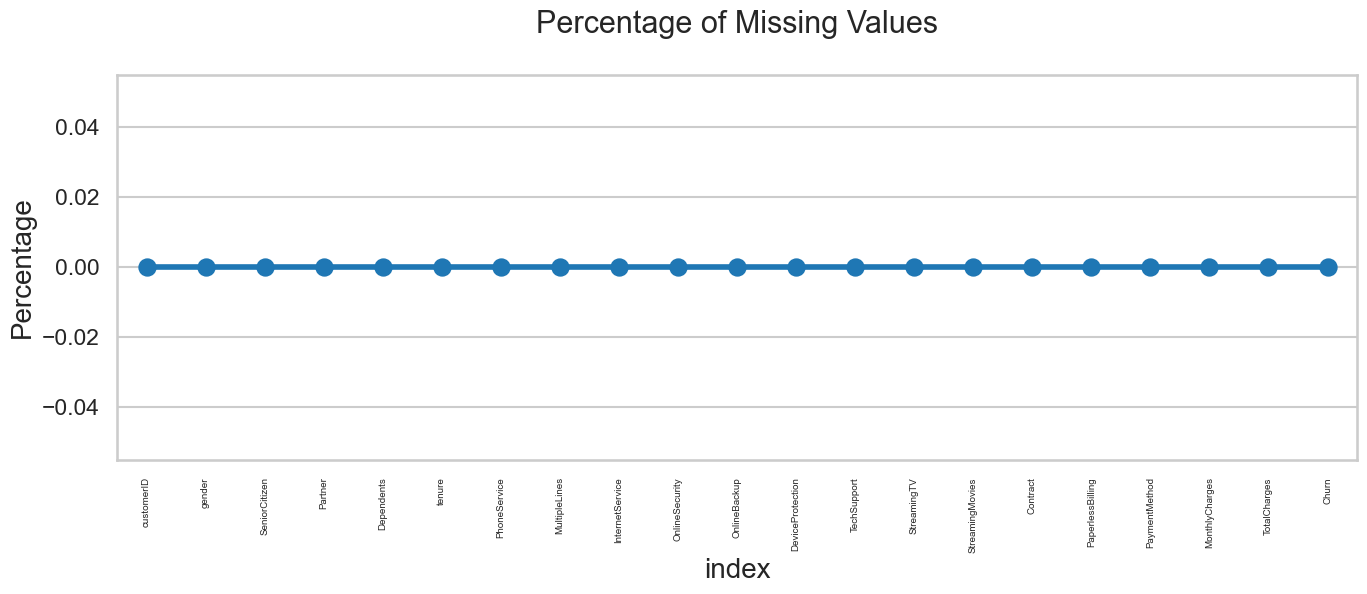

In [154]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot(x="index", y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

### Missing Data - Initial Intuition
<ul><li>Here, we don't have any missing data.</li></ul>
General Thumb Rules:
<ul>
<li>For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.</li>
<li>For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.</li>
</ul>

### Data Cleaning

1. Create a copy of base data for manipulation and processing

In [155]:
new_df=df.copy()

2. Total charges should be numeric amount. Lets convert it to numerical data type.

In [156]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges, errors="coerce")
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Lets check this records

In [157]:
new_df.loc[new_df["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatment

<p>11*100/7043=0.15%</p>
Since the percentage of these records compared to total dataset is very low i.e. 0.15%. It is safe to ignore them from further processing

In [158]:
# Removing missing values
new_df.dropna(how="any", inplace=True)


5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [159]:
# Get the max tenure
df["tenure"].max()

72

In [160]:
# Group the tenure in bins of 12 months
labels=["{0}-{1}".format(i, i+11) for i in range(1,72,12)]
print(labels)

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


In [161]:
# Group the tenure in bins of 12 months
new_df["tenure_group"]=pd.cut(new_df.tenure, bins=range(1,80,12),right=False, labels=labels)

In [162]:
new_df.tenure_group.value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

6. Remove columns not required for processing

In [163]:
# Remove column customerID and tenure
new_df.drop(columns=["customerID", "tenure"], axis=1, inplace=True)

In [164]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration

1.Plot distribution of individual predictors by churn

### Univariate Analysis

In [165]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


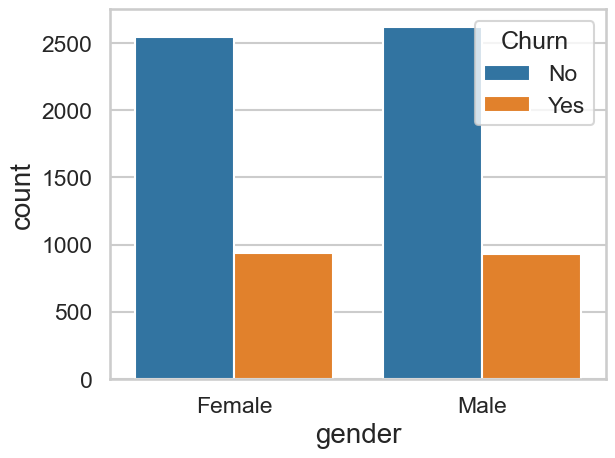

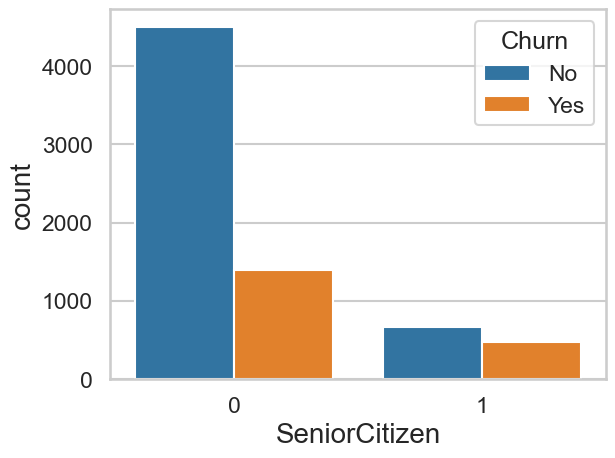

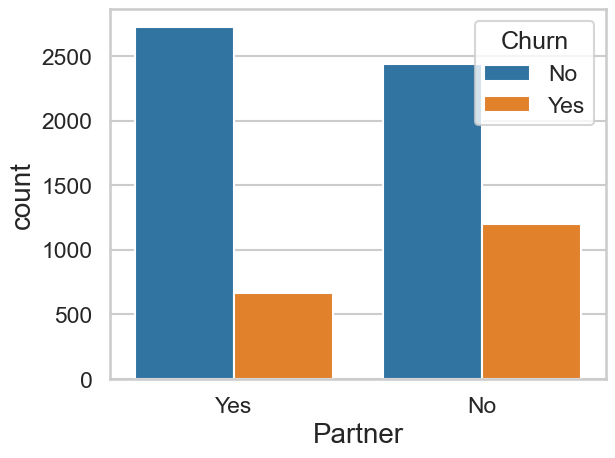

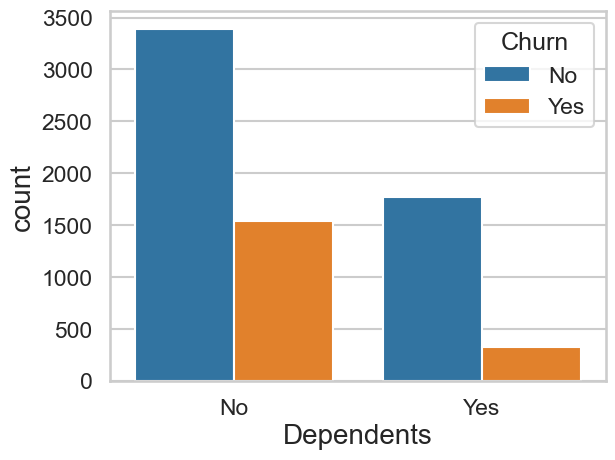

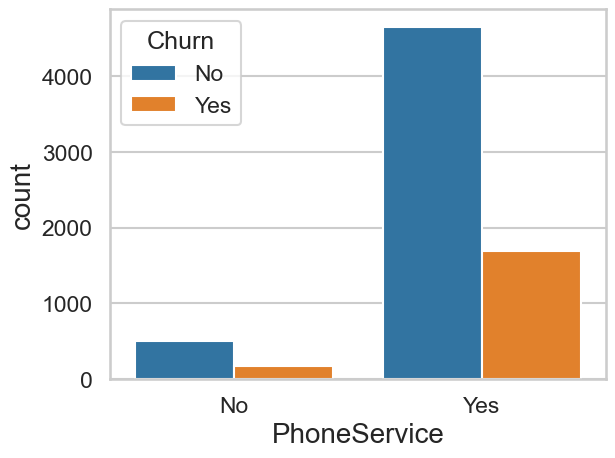

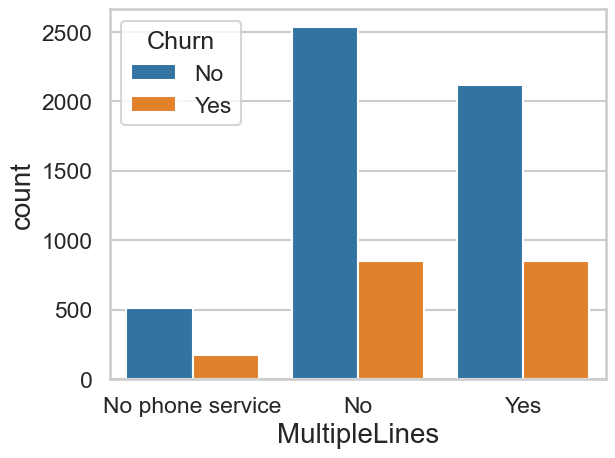

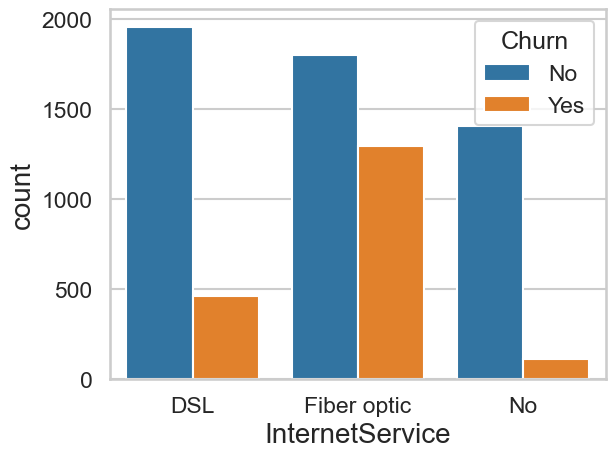

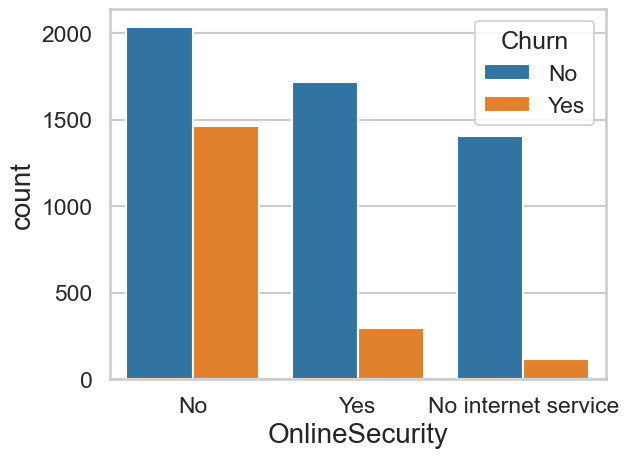

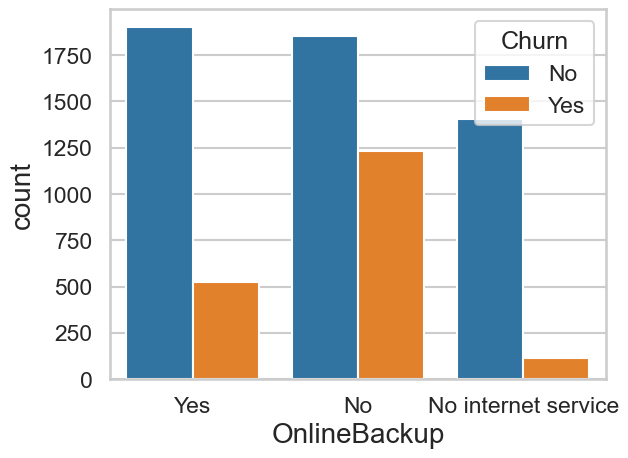

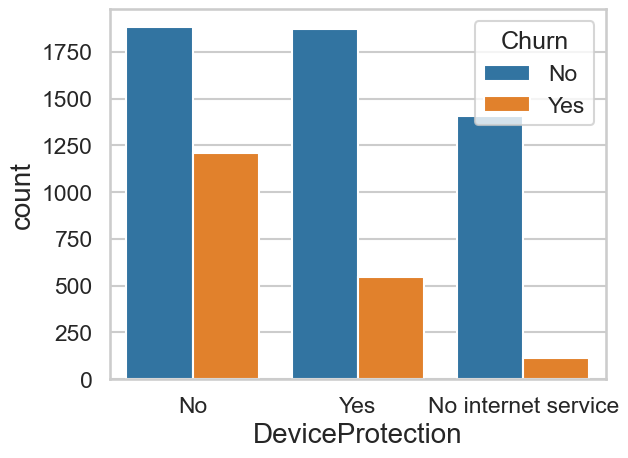

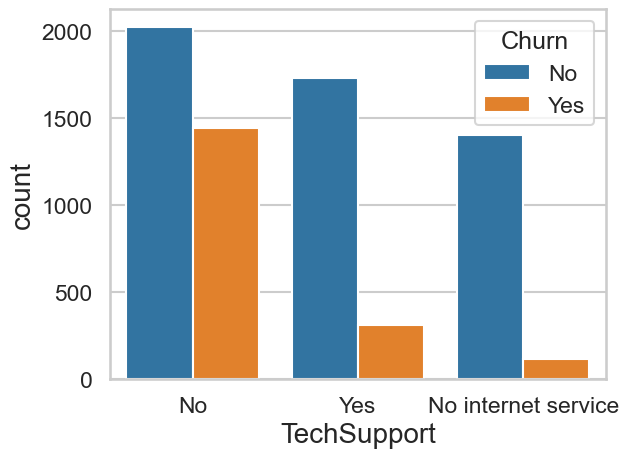

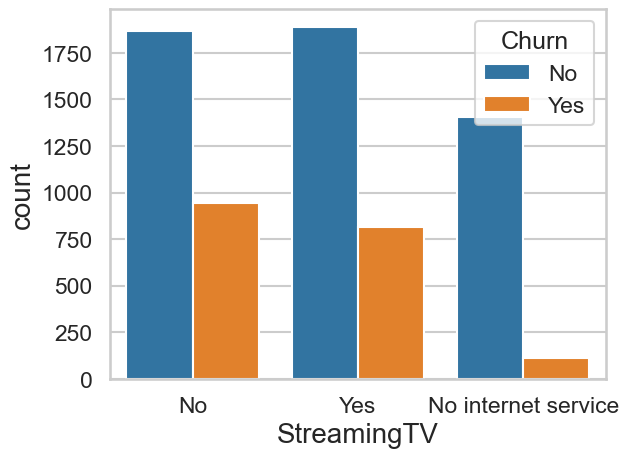

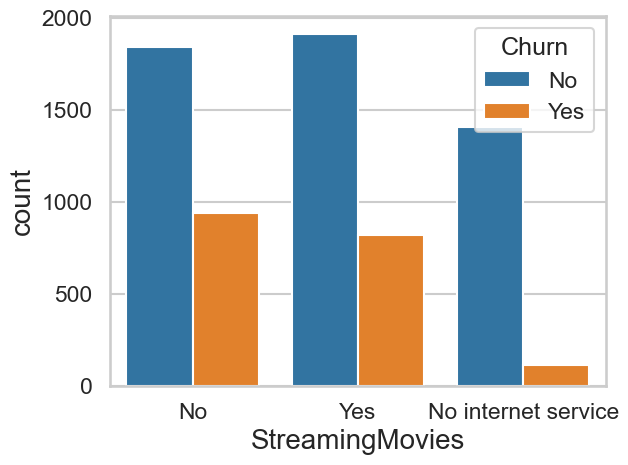

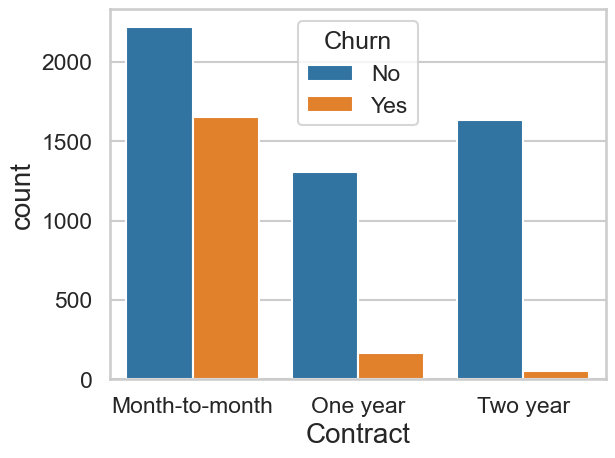

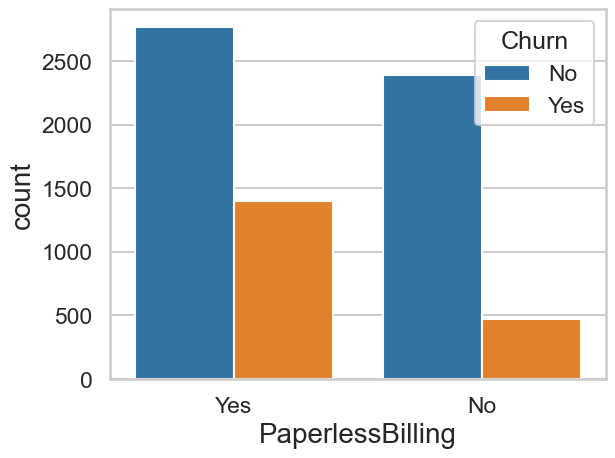

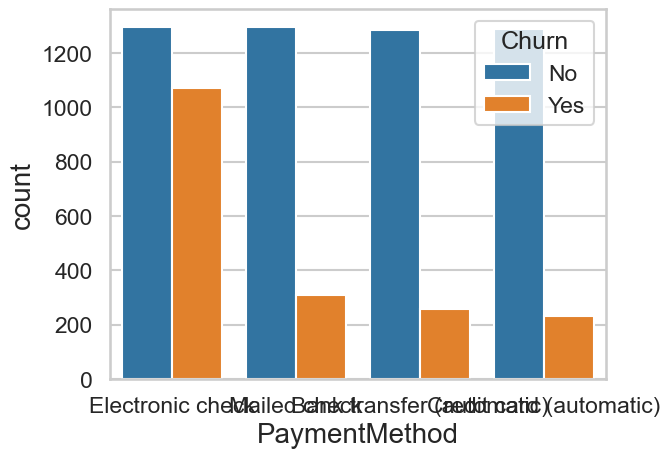

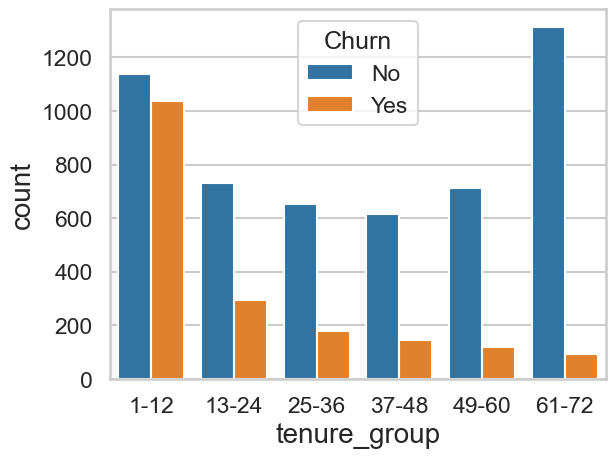

In [166]:
for i, predictor in enumerate(new_df.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"])):   ## i is column index and predictor is column name
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue="Churn")

![](calculation_analysis.png)

1. Senior citizens are more likely to churn
2. People with no partners are more likely to churn
3. Monthly contracts are more likely to churn because they are free customers
4. People who pay via electronic checks are more likely to churn

## Numerical Analysis

In [167]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [168]:
new_df1_target0 = new_df[new_df["Churn"]=="No"]
new_df1_target1 = new_df[new_df["Churn"]=="Yes"]

In [169]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [170]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [171]:
new_df["Churn"]=np.where(new_df["Churn"]=="Yes", 1,0)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


3. Convert all the categorical variables into dummy variables

In [172]:
new_df_dummies=pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Relationship between Monthly Charges and Total Charges

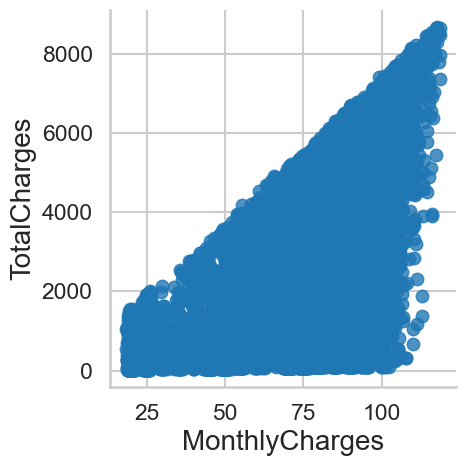

In [173]:
sns.lmplot(data=new_df_dummies, x="MonthlyCharges", y="TotalCharges", fit_reg=False)  ##linear model plot

In [174]:
# calculate the correlation
new_df_dummies["MonthlyCharges"].corr(new_df_dummies["TotalCharges"])

0.6510648032262024

Total Charges increase as Monthly Charges increase - as expected.

1. Senior citizens are more likely to churn
2. People with no partners are more likely to churn
3. Monthly contracts are more likely to churn because they are free customers
4. People who pay via electronic checks are more likely to churn
5. Monthly charges and total charges are positively correlated

Churn by monthly charges and total charges

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

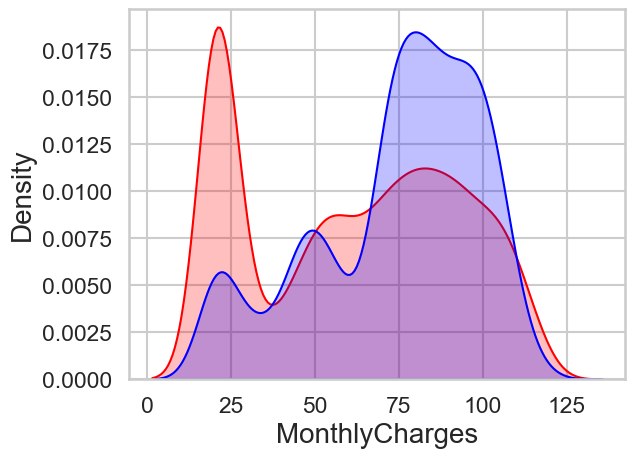

In [175]:
sns.kdeplot(new_df_dummies["MonthlyCharges"][(new_df_dummies["Churn"]==0)], color="Red", fill=True)
sns.kdeplot(new_df_dummies["MonthlyCharges"][(new_df_dummies["Churn"]==1)], color="Blue", fill=True)

Text(0.5, 1.0, 'Month charges by churn')

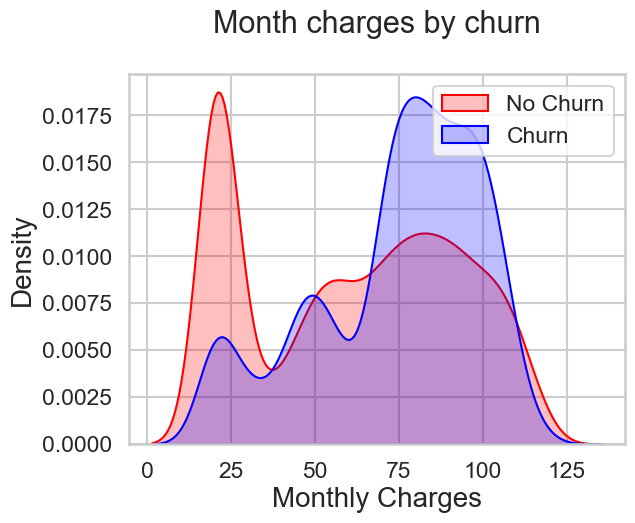

In [176]:
Tot=sns.kdeplot(new_df_dummies["MonthlyCharges"][(new_df_dummies["Churn"]==0)], color="Red", fill=True)
Tot=sns.kdeplot(new_df_dummies["MonthlyCharges"][(new_df_dummies["Churn"]==1)], color="Blue", ax=Tot, fill=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Monthly Charges')
Tot.set_title('Month charges by churn')

<b>Insight:</b> Churn is high when Monthly Charges ar high

1. Senior citizens are more likely to churn
2. People with no partners are more likely to churn
3. Monthly contracts are more likely to churn because they are free customers
4. People who pay via electronic checks are more likely to churn
5. Monthly charges and total charges are positively correlated
6. Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

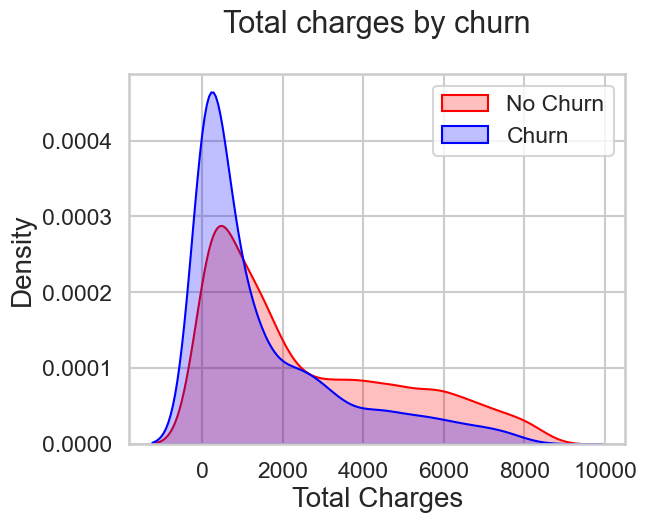

In [177]:
Tot=sns.kdeplot(new_df_dummies["TotalCharges"][(new_df_dummies["Churn"]==0)], color="Red", fill=True)
Tot=sns.kdeplot(new_df_dummies["TotalCharges"][(new_df_dummies["Churn"]==1)], color="Blue", ax=Tot, fill=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz <b>Higher Monthly Charge</b>, <b>Lower tenure</b> and <b>Lower Total Charge</b> are linkd to <b>High Churn</b>.

##### Build a correlation of all predictors with "Churn"

<Axes: >

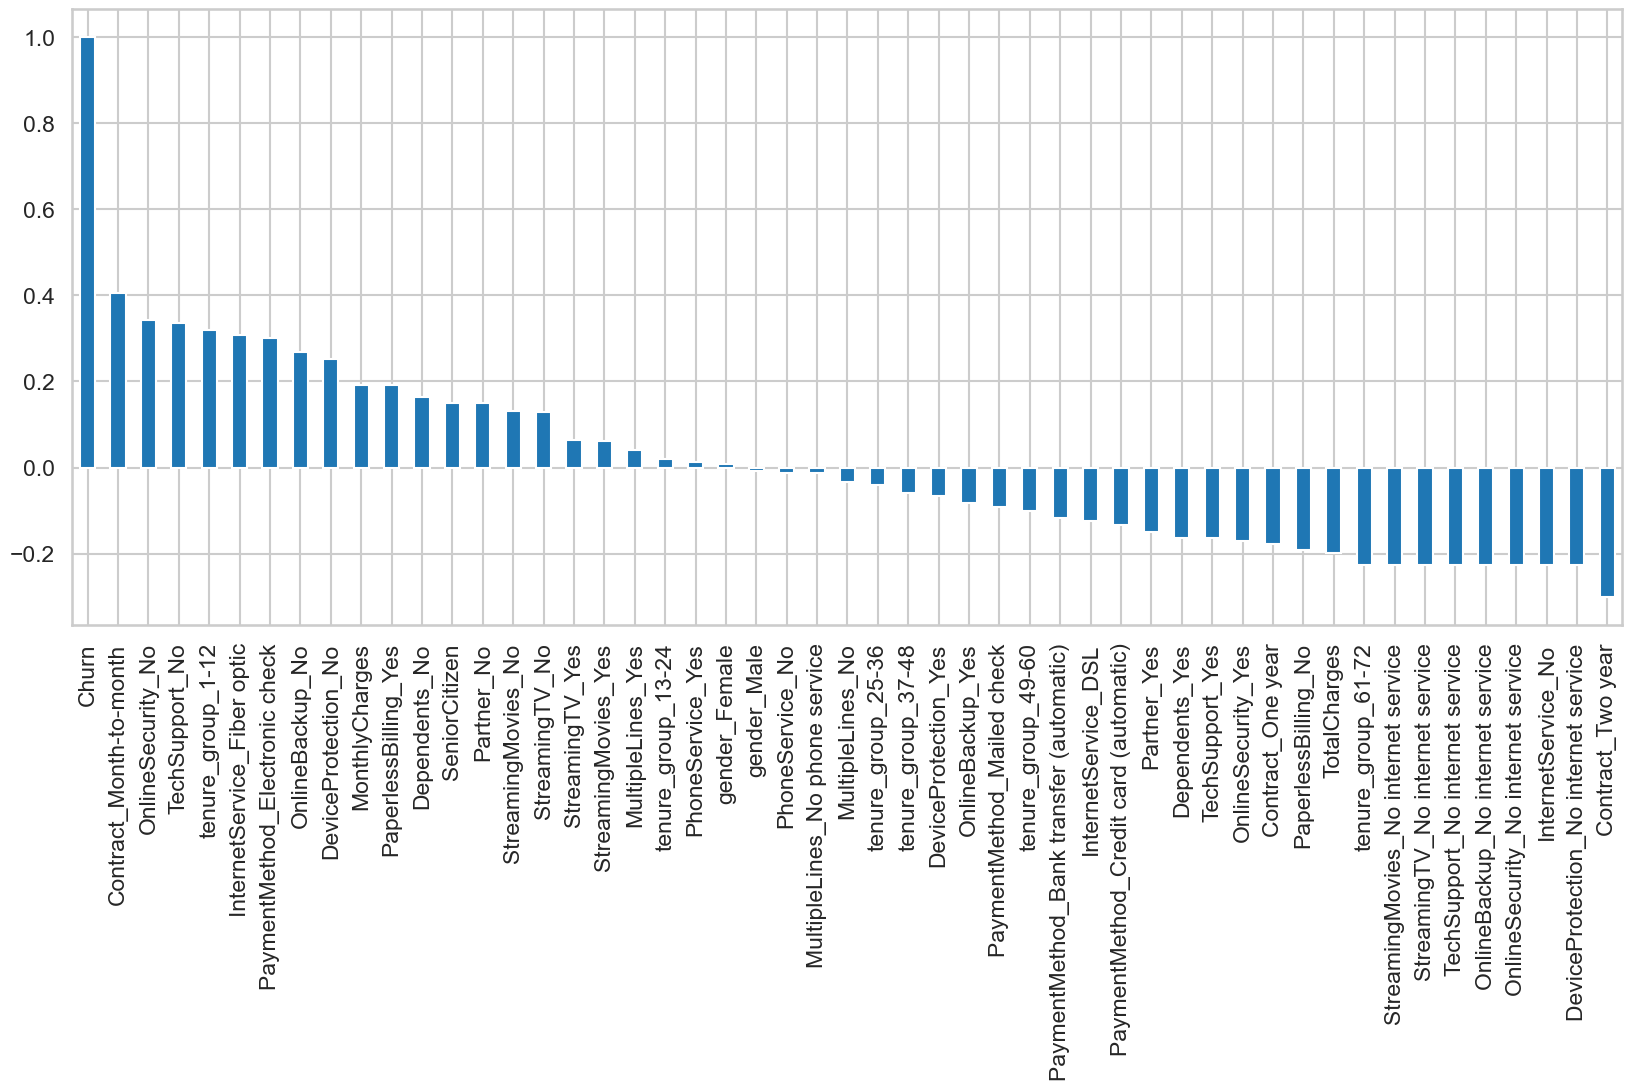

In [178]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

**Derived Insight: **

<b>HIGH</b> Churn seen in case of <b>Month to month contracts, No online security, No Tech support, First year of subscription</b> and <b>Fibre Optics Internet</b>

<b>LOW Churn is seens in case of <b>Long term contracts, Subscriptions without internet service</b> and <b>The customers engaged for 5+ years</b>

Factors like <b>Gender, Availability of PhoneService</b> and <b>no. of multiple lines</b> have alomost <b>NO</b> impact on Churn

This is also evident from the Heatmap below

<Axes: >

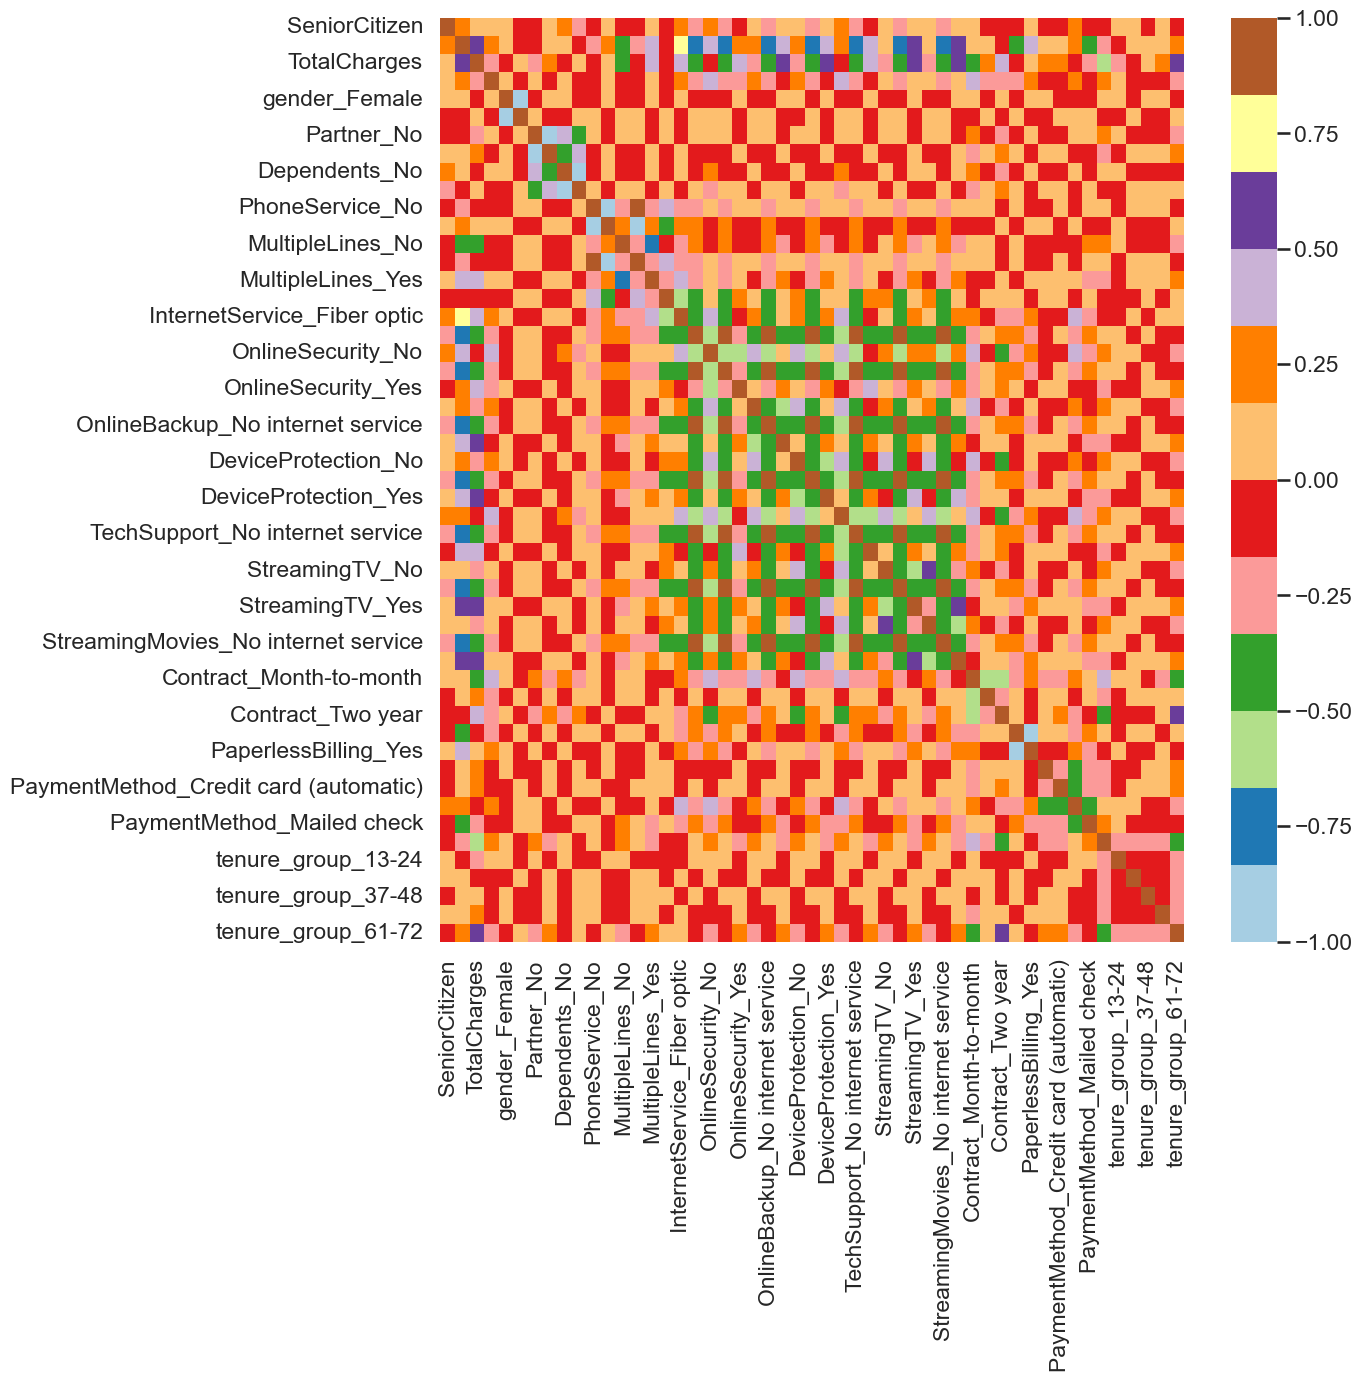

In [179]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

In [180]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


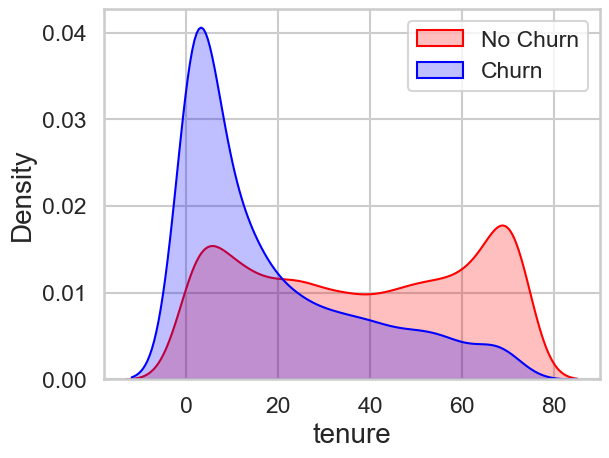

In [181]:
Tot=sns.kdeplot(df["tenure"][(df["Churn"]=="No")], color="Red", fill=True)
Tot=sns.kdeplot(df["tenure"][(df["Churn"]=="Yes")], color="Blue", ax=Tot, fill=True)
Tot.legend(["No Churn","Churn"],loc='upper right')


### Bivariate Analysis

In [182]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [183]:
len(new_df1_target0)

5163

In [184]:
len(new_df1_target1)

1869

In [185]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
   # width = len(df[col].unique()) + 7 + 4*len(temp.unique())
   # fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
   # plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

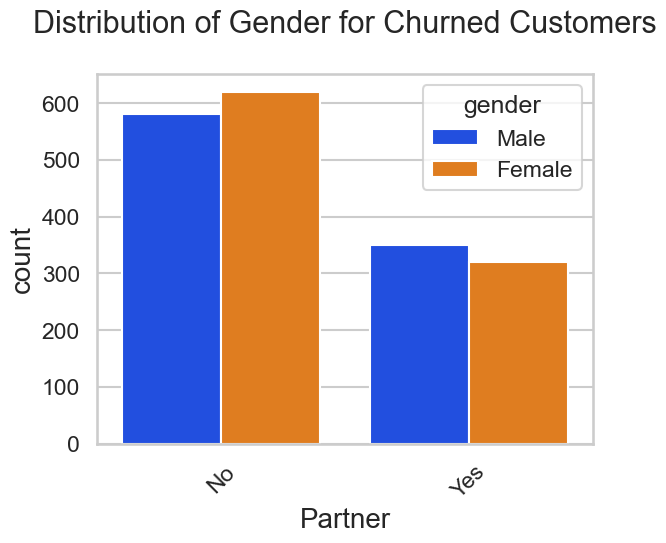

In [186]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

Text(0.5, 1.0, 'Distribution of Gender for Churned Customers')

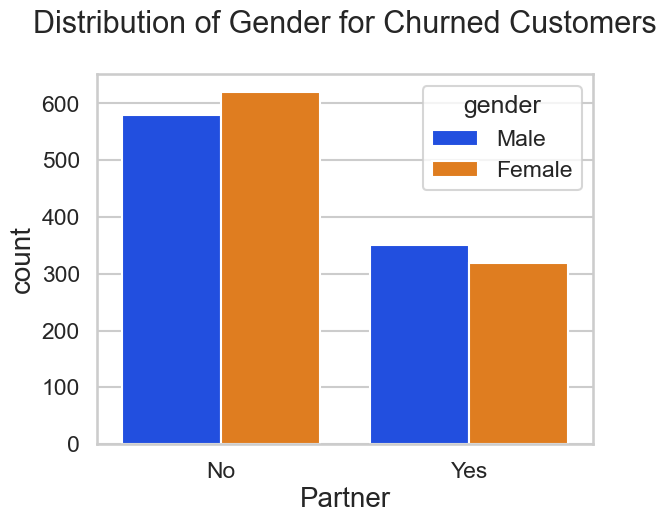

In [187]:
sns.countplot(data = new_df1_target1, x= "Partner", order=new_df1_target1["Partner"].value_counts().index,hue = "gender" ,palette='bright') 
plt.title("Distribution of Gender for Churned Customers")

Text(0.5, 1.0, 'Distribution of Gender for Non Churned Customers')

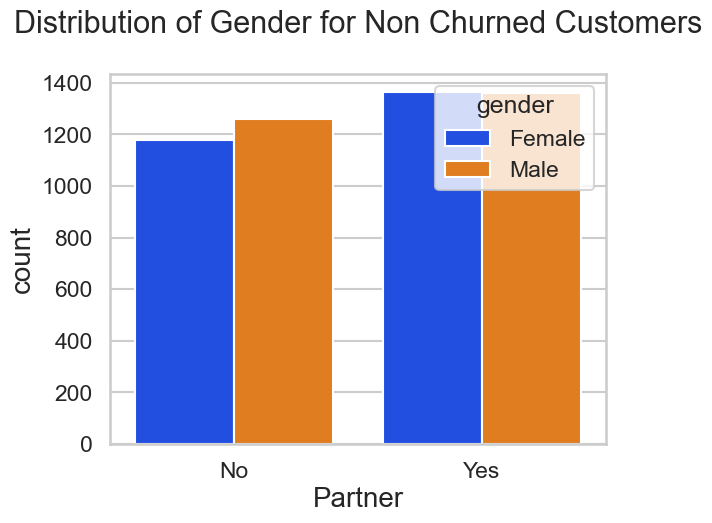

In [188]:
sns.countplot(data = new_df1_target0, x= "Partner", order=new_df1_target1["Partner"].value_counts().index,hue = "gender" ,palette='bright') 
plt.title("Distribution of Gender for Non Churned Customers")

Insight -- female with no partner are more likely to churn

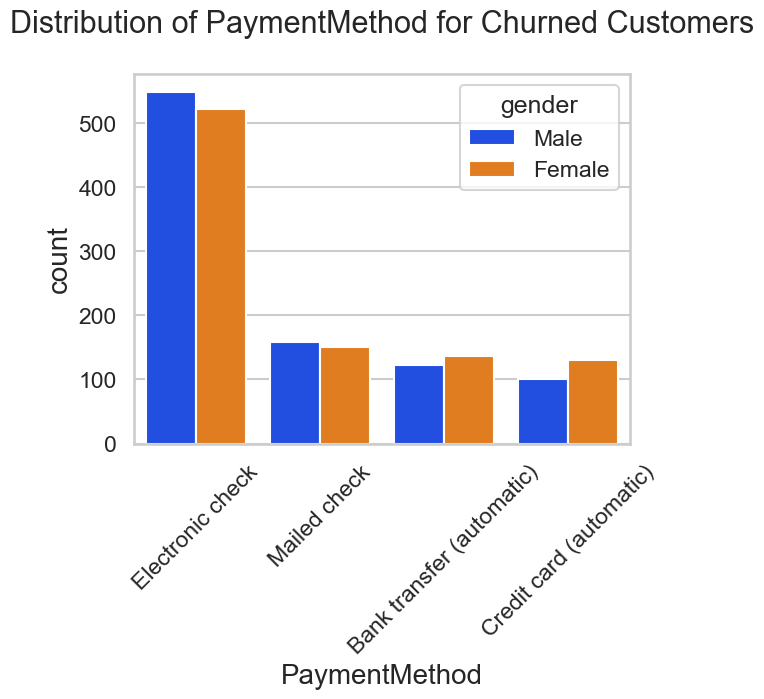

In [189]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

female who pay via credit card are more likely to churn

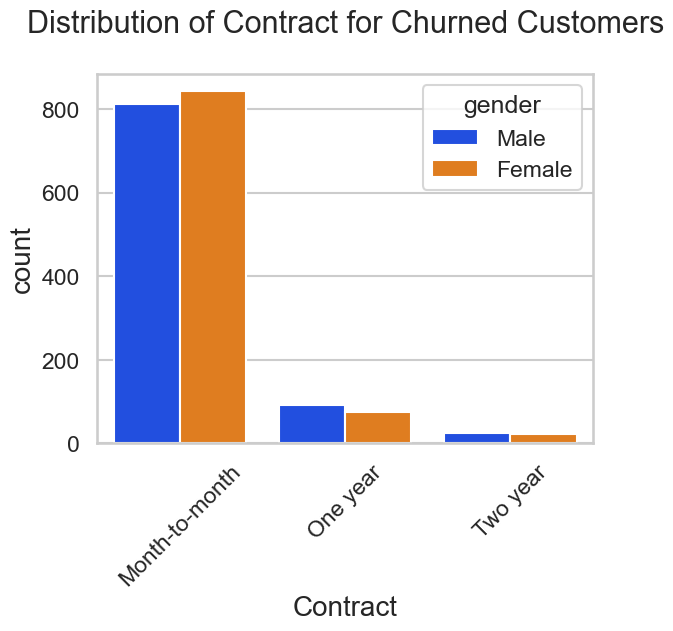

In [191]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

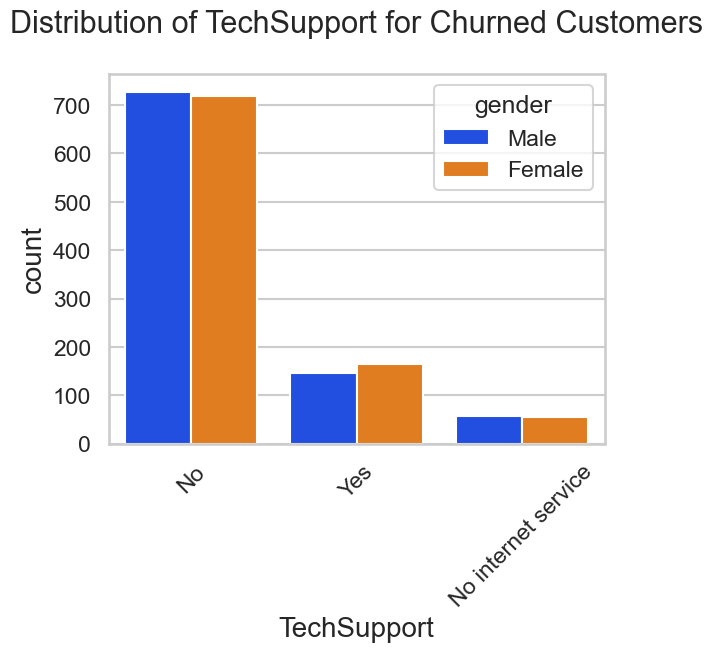

In [192]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


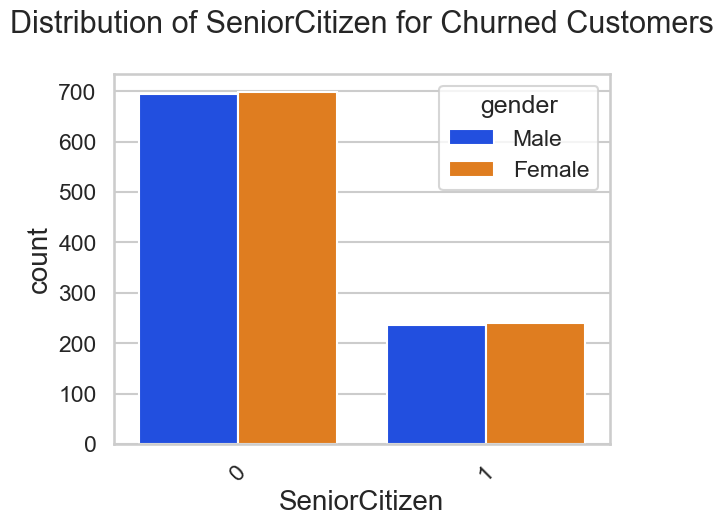

In [193]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


<p>CONCLUSION</p>
These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


<p>Note: There could be many more such insights, so take this as an assignment and try to get more insights :)</p>



1. Senior citizens are more likely to churn
2. People with no partners are more likely to churn
3. Monthly contracts are more likely to churn because they are free customers
4. People who pay via electronic checks are more likely to churn
5. Monthly charges and total charges are positively correlated
6. Churn is high when Monthly Charges ar high